## Feature Importance using Multiple Algorithum and Feature selction

Based on the R-squared scores achieved after hyperparameter tuning:

 - Tuned KNN Model: R-squared (R2): 0.7666
 - Tuned Gradient Boosting Regressor Model: R-squared (R2): 0.7238
 - 
The Tuned KNN Model achieved a slightly higher R-squared score (0.7666) compared to the Tuned Gradient Boosting Regressor Model (0.7238), indicating that it explains a larger proportion of the variance in the target variable (PriceEuro) on the test set.

Therefore, based on the current analysis, the KNN algorithm with the best hyperparameters found (n_neighbors: 7, p: 1, weights: 'distance') achieved the maximum accuracy/R2 score among the models evaluated.

Regarding feature importance, in the context of linear models, the coefficients can give an indication of the importance of each feature. However, for non-linear models like KNN and Gradient Boosting, it's not as straightforward to get a single "feature importance" value directly from the model's coefficients.

From the initial correlation analysis, the features with high correlation with PriceEuro (absolute correlation > 0.3) were identified as:

TopSpeed_KmH
Range_Km
FastCharge_KmH
Battery_Pack Kwh
AccelSec
PowerTrain
Efficiency_WhKm
These features were used to train the models. While we don't have explicit feature importance scores from the tuned non-linear models in this notebook, the fact that these features were selected based on their correlation with the target variable suggests they are likely important predictors of PriceEuro.

---

Now see how that was came

Import necessay libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df= pd.read_csv('ElectricCarData_Modified.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/vipul/Downloads/ElectricCarData_Modified.csv'

In [ ]:
df.head()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,460,70.0,161,940,1,1,1,3,3,5,55480
1,10.0,160,270,45.0,167,250,1,3,1,2,1,5,30000
2,4.7,210,400,75.0,181,620,1,1,1,4,3,5,56440
3,6.8,180,360,74.0,206,560,1,3,1,1,3,5,68040
4,9.5,145,170,28.5,168,190,1,3,1,2,2,4,32997


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AccelSec          102 non-null    float64
 1   TopSpeed_KmH      102 non-null    int64  
 2   Range_Km          102 non-null    int64  
 3   Battery_Pack Kwh  102 non-null    float64
 4   Efficiency_WhKm   102 non-null    int64  
 5   FastCharge_KmH    102 non-null    int64  
 6   RapidCharge       102 non-null    int64  
 7   PowerTrain        102 non-null    int64  
 8   PlugType          102 non-null    int64  
 9   BodyStyle         102 non-null    int64  
 10  Segment           102 non-null    int64  
 11  Seats             102 non-null    int64  
 12  PriceEuro         102 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 10.5 KB


In [ ]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,0.950980,1.843137,1.147059,2.117647,2.970588,4.882353,55997.588235
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.216975,0.792853,0.431370,1.484535,1.869271,0.799680,34250.724403
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,34414.750000
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,1.000000,2.000000,1.000000,2.000000,2.500000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,1.000000,2.000000,1.000000,2.000000,4.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,1.000000,3.000000,3.000000,7.000000,7.000000,7.000000,215000.000000


In [ ]:
df.isnull().sum()

AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [ ]:
df.shape

(102, 13)

In [ ]:
df.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
AccelSec,1.000000,-0.786146,-0.677877,-0.678295,-0.382600,-0.782624,-0.515392,0.520857,0.147108,0.161254,0.070357,-0.175620,-0.627302
TopSpeed_KmH,-0.786146,1.000000,0.748110,0.721658,0.354889,0.778327,0.251837,-0.560318,-0.053332,0.139912,0.174730,0.126938,0.829107
Range_Km,-0.677877,0.748110,1.000000,0.910344,0.313517,0.754355,0.400902,-0.452590,-0.173802,0.157469,0.052293,0.299857,0.676672
Battery_Pack Kwh,-0.678295,0.721658,0.910344,1.000000,0.640547,0.693696,0.342255,-0.486013,-0.179933,0.149685,0.249533,0.330358,0.657401
Efficiency_WhKm,-0.382600,0.354889,0.313517,0.640547,1.000000,0.317994,0.106887,-0.394311,-0.081634,0.086596,0.502010,0.302300,0.395122
FastCharge_KmH,-0.782624,0.778327,0.754355,0.693696,0.317994,1.000000,0.450928,-0.481449,-0.295204,0.061167,0.046542,0.263871,0.657904
RapidCharge,-0.515392,0.251837,0.400902,0.342255,0.106887,0.450928,1.000000,-0.275357,-0.451136,-0.258562,-0.394175,0.422935,0.198799
PowerTrain,0.520857,-0.560318,-0.452590,-0.486013,-0.394311,-0.481449,-0.275357,1.000000,0.068116,-0.009402,-0.210242,-0.279251,-0.561468
PlugType,0.147108,-0.053332,-0.173802,-0.179933,-0.081634,-0.295204,-0.451136,0.068116,1.000000,0.111865,0.103648,-0.064157,-0.073908
BodyStyle,0.161254,0.139912,0.157469,0.149685,0.086596,0.061167,-0.258562,-0.009402,0.111865,1.000000,0.465090,-0.021586,0.216790


In [ ]:
def get_high_correlation_features(dataframe, target_variable, threshold= + 0.3):
    """
    Returns a list of features with high correlation with the target variable.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        target_variable (str): The name of the target variable.
        threshold (float): The correlation threshold. Features with absolute
                           correlation above this value will be returned.

    Returns:
        list: A list of feature names with high correlation with the target variable.
    """
    correlation_matrix = dataframe.corr(numeric_only=True)
    target_correlation = correlation_matrix[target_variable].abs().sort_values(ascending=False)
    high_correlation_features = target_correlation[target_correlation > threshold].index.tolist()
    # Remove the target variable itself from the list
    if target_variable in high_correlation_features:
        high_correlation_features.remove(target_variable)
    return high_correlation_features

# Example usage with your DataFrame 'df' and target variable 'PriceEuro'
high_corr_features = get_high_correlation_features(df, 'PriceEuro')
print(f"Features with high correlation with PriceEuro: {high_corr_features}")

Features with high correlation with PriceEuro: ['TopSpeed_KmH', 'Range_Km', 'FastCharge_KmH', 'Battery_Pack Kwh', 'AccelSec', 'PowerTrain', 'Efficiency_WhKm']


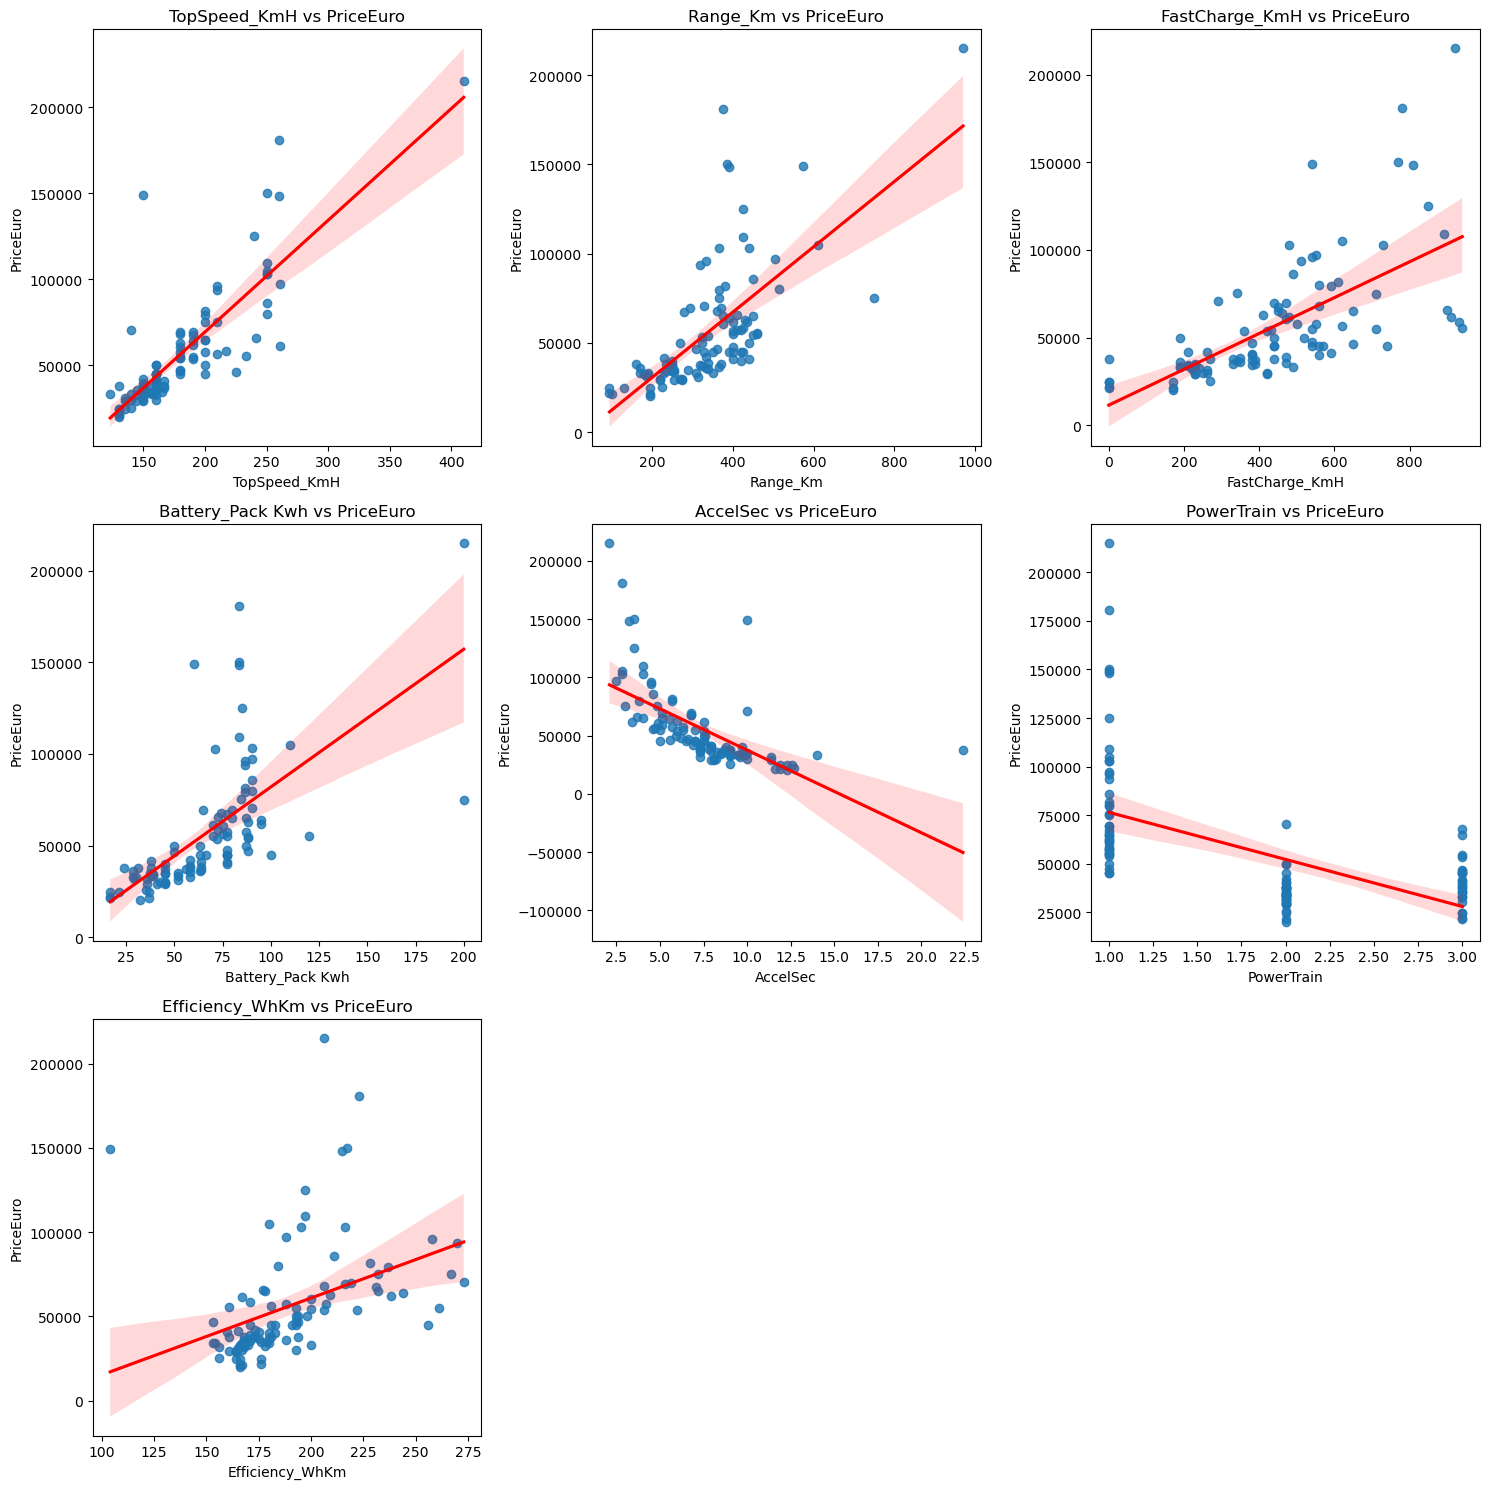

In [ ]:
import matplotlib.pyplot as plt

high_corr_features

# Determine the number of rows and columns for subplots
n_features = len(high_corr_features)
n_cols = 3  # You can adjust the number of columns
n_rows = (n_features + n_cols - 1) // n_cols

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Generate a regplot for each high correlation feature
for i, feature in enumerate(high_corr_features):
    sns.regplot(x=df[feature], y=df['PriceEuro'], ax=axes[i], line_kws={'color': 'red'})
    axes[i].set_title(f'{feature} vs PriceEuro')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Get the list of all columns in the DataFrame
all_columns = df.columns.tolist()

# Identify features to drop (columns not in high_corr_features and not the target variable)
features_to_drop = [col for col in all_columns if col not in high_corr_features and col != 'PriceEuro']

# Drop the identified features from the DataFrame
df_selected_features = df.drop(columns=features_to_drop)

# Display the first few rows of the new DataFrame with selected features
display(df_selected_features.head())

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,PowerTrain,PriceEuro
0,4.6,233,460,70.0,161,940,1,55480
1,10.0,160,270,45.0,167,250,3,30000
2,4.7,210,400,75.0,181,620,1,56440
3,6.8,180,360,74.0,206,560,3,68040
4,9.5,145,170,28.5,168,190,3,32997


In [ ]:
dfs = df_selected_features

In [ ]:
dfs.head()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,PowerTrain,PriceEuro
0,4.6,233,460,70.0,161,940,1,55480
1,10.0,160,270,45.0,167,250,3,30000
2,4.7,210,400,75.0,181,620,1,56440
3,6.8,180,360,74.0,206,560,3,68040
4,9.5,145,170,28.5,168,190,3,32997


Feature Engineering

In [ ]:
df['Performance_to_Range_Ratio']=df['TopSpeed_KmH']/df['Range_Km']
df['Range_x_Battery']=df['Range_Km']*df['Battery_Pack Kwh']
df['TopSpeed_x_AccelSec']=df['TopSpeed_KmH']*df['AccelSec']
df['FastCharge_x_Battery']=df['FastCharge_KmH']*df['Battery_Pack Kwh']
df['Battery_per_Range']=df['Battery_Pack Kwh']/df['Range_Km']
df['FastCharge_per_Range']=df['FastCharge_KmH']/df['Range_Km']
df['AccelSec_per_TopSpeed']=df['AccelSec']/df['TopSpeed_KmH']
df['Range_Km_sqaured']=df['Range_Km']**2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are the original, unscaled features and target variable
# If not, make sure X and y are defined correctly before this cell
X = df_selected_features.drop('PriceEuro', axis=1)
y = df_selected_features['PriceEuro']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multiple Linear Regression model
mlr_model = LinearRegression()

# Train the model on the training data
mlr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 295542685.42263645
R-squared (R2): 0.6293149064747932


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN Regressor model
# You can experiment with different values for n_neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Model:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R-squared (R2): {r2_knn}")

K-Nearest Neighbors Model:
Mean Squared Error (MSE): 389469197.81523806
R-squared (R2): 0.5115073620892563


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN Regressor model
# You can experiment with different values for n_neighbors
knn_model = KNeighborsRegressor(n_neighbors=3)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Model:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R-squared (R2): {r2_knn}")

K-Nearest Neighbors Model:
Mean Squared Error (MSE): 231569556.37566134
R-squared (R2): 0.7095533508469366


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor model
# You can experiment with different hyperparameters
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
# GradientBoostingRegressor expects y to be 1D, so we need to flatten y_train if it's not already
gbr_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_gbr}")
print(f"R-squared (R2): {r2_gbr}")

Gradient Boosting Regressor Model:
Mean Squared Error (MSE): 211909273.7891927
R-squared (R2): 0.7342123055386264


# Task
Apply hyperparameter tuning to the KNN model for regression using GridSearchCV.

## Define parameter grid

### Subtask:
Specify the range of hyperparameters (like `n_neighbors`, `weights`, `p`) to search over for the KNN model.


**Reasoning**:
Define the hyperparameter grid for KNN regression.



In [ ]:
# Specify the range of hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

## Initialize gridsearchcv

### Subtask:
Set up `GridSearchCV` with the KNN model, the parameter grid, cross-validation settings, and scoring metric.


**Reasoning**:
Set up GridSearchCV with the KNN model, the parameter grid, cross-validation settings, and scoring metric.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate a KNeighborsRegressor model
knn = KNeighborsRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

## Perform grid search

### Subtask:
Fit `GridSearchCV` to the training data to find the best combination of hyperparameters.


**Reasoning**:
Fit the GridSearchCV object to the training data.



In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

## Get best model

### Subtask:
Extract the best performing KNN model from the grid search results.


**Reasoning**:
Extract the best estimator and best parameters from the fitted GridSearchCV object and print the best parameters.



In [ ]:
# Access the best performing model and best hyperparameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters found
print(f"Best hyperparameters found by GridSearchCV: {best_params}")

Best hyperparameters found by GridSearchCV: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


## Evaluate best model

### Subtask:
Evaluate the best KNN model on the test set using appropriate regression metrics (MSE, R2).


**Reasoning**:
Evaluate the best KNN model on the test set using appropriate regression metrics (MSE, R2).



In [ ]:
# Make predictions on the test data using the best KNN model
y_pred_best_knn = best_knn_model.predict(X_test)

# Evaluate the best model
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

print(f"Best K-Nearest Neighbors Model after GridSearchCV:")
print(f"Mean Squared Error (MSE): {mse_best_knn}")
print(f"R-squared (R2): {r2_best_knn}")

Best K-Nearest Neighbors Model after GridSearchCV:
Mean Squared Error (MSE): 186114662.53259474
R-squared (R2): 0.7665652560859384


## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found by `GridSearchCV` for the KNN regression model are `n_neighbors`: 7, `p`: 1, and `weights`: 'distance'.
*   The best KNN model, tuned with `GridSearchCV`, achieved a Mean Squared Error (MSE) of approximately 186,114,662.53 on the test set.
*   The R-squared (R2) score for the best KNN model on the test set is approximately 0.7666, indicating that the model explains about 76.66% of the variance in the target variable.

### Insights or Next Steps

*   Compare the performance of the tuned KNN model with other regression models to determine if KNN is the most suitable algorithm for this task.
*   Consider exploring a wider range of hyperparameters or different cross-validation strategies in `GridSearchCV` to potentially further improve the model's performance.


# Task
Apply hyperparameter tuning to the Gradient Boosting Regressor model using GridSearchCV.

## Define parameter grid

### Subtask:
Specify the range of hyperparameters (like `n_estimators`, `learning_rate`, `max_depth`, `min_samples_split`, `min_samples_leaf`) to search over for the Gradient Boosting Regressor.


**Reasoning**:
Define the hyperparameter grid for Gradient Boosting Regressor.



In [ ]:
# Specify the range of hyperparameters to search over for Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Initialize gridsearchcv

### Subtask:
Set up `GridSearchCV` with the Gradient Boosting Regressor model, the parameter grid, cross-validation settings, and scoring metric.


**Reasoning**:
Set up GridSearchCV with the Gradient Boosting Regressor model, the parameter grid, cross-validation settings, and scoring metric.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate a GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error')

## Perform grid search

### Subtask:
Fit `GridSearchCV` to the training data to find the best combination of hyperparameters.


**Reasoning**:
Fit the GridSearchCV object to the training data.



In [ ]:
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

## Get best model

### Subtask:
Extract the best performing Gradient Boosting Regressor model from the grid search results.


**Reasoning**:
Extract the best estimator and best parameters from the fitted GridSearchCV object and print the best parameters.



In [ ]:
# Access the best performing model and best hyperparameters
best_gbr_model = grid_search_gbr.best_estimator_
best_params_gbr = grid_search_gbr.best_params_

# Print the best parameters found
print(f"Best hyperparameters found by GridSearchCV for Gradient Boosting Regressor: {best_params_gbr}")

Best hyperparameters found by GridSearchCV for Gradient Boosting Regressor: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Evaluate best model

### Subtask:
Evaluate the best Gradient Boosting Regressor model on the test set using appropriate regression metrics (MSE, R2).


**Reasoning**:
Evaluate the best Gradient Boosting Regressor model on the test set using appropriate regression metrics (MSE, R2).



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data using the best Gradient Boosting Regressor model
y_pred_best_gbr = best_gbr_model.predict(X_test)

# Evaluate the best model
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

print(f"Best Gradient Boosting Regressor Model after GridSearchCV:")
print(f"Mean Squared Error (MSE): {mse_best_gbr}")
print(f"R-squared (R2): {r2_best_gbr}")

Best Gradient Boosting Regressor Model after GridSearchCV:
Mean Squared Error (MSE): 220204117.45409638
R-squared (R2): 0.7238084787773422


## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found by GridSearchCV for the Gradient Boosting Regressor were `{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}`.
*   The best Gradient Boosting Regressor model achieved a Mean Squared Error (MSE) of approximately 220,204,117.45 on the test set.
*   The R-squared (R2) score for the best model on the test set was approximately 0.724, indicating that about 72.4\% of the variance in the target variable is explained by the model.

### Insights or Next Steps

*   Compare the performance metrics of the tuned Gradient Boosting Regressor with other models to determine which model is most suitable for the task.
*   Consider exploring other hyperparameter tuning techniques like RandomizedSearchCV or Bayesian optimization for potentially more efficient search.


# Task
Analyze the provided dataset to determine which regression algorithm (Linear Regression, Ridge, Lasso, Elastic Net, KNN, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, or SVR) achieves the highest accuracy (R2 score). Identify the most important features based on the best-performing algorithm.

## Calculate permutation importance

### Subtask:
Use the `permutation_importance` function from `sklearn.inspection` to calculate the importance of each feature for the best KNN model on the test set.


**Reasoning**:
Calculate the permutation importance of features for the best KNN model on the test set.



In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best KNN model
result = permutation_importance(best_knn_model, X_test, y_test, scoring='r2', random_state=42)

## Visualize permutation importance

### Subtask:
Create a bar plot to visualize the calculated permutation importance scores for each feature.


**Reasoning**:
Create a pandas Series from the permutation importance results, sort it, and then create a bar plot to visualize the feature importance.



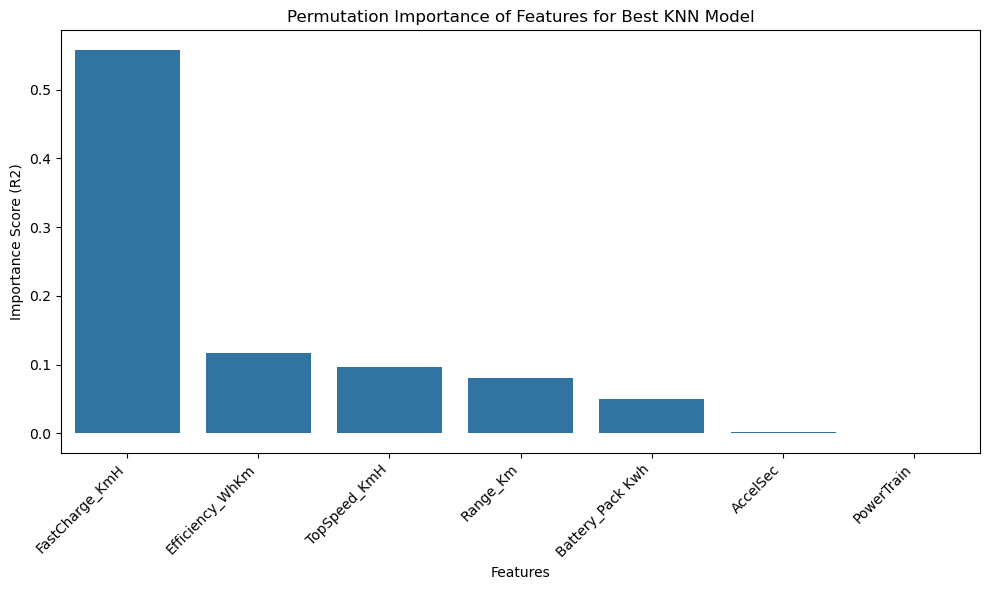

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# Create a pandas Series from the permutation importance results
feature_importance = pd.Series(result.importances_mean, index=X_test.columns)

# Sort the feature importance Series in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Create a bar plot of the sorted feature importance Series
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values)

# Add title and labels
plt.title("Permutation Importance of Features for Best KNN Model")
plt.xlabel("Features")
plt.ylabel("Importance Score (R2)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `permutation_importance` function was successfully used to calculate the importance of each feature for the best KNN model, utilizing the R-squared score as the evaluation metric.
*   A bar plot was generated to visualize the permutation importance scores, clearly showing the relative importance of each feature for the best KNN model.

### Insights or Next Steps

*   Based on the permutation importance plot, identify the top features and consider focusing on these features for potential feature engineering or further analysis to improve model performance.
*   Explore the relationships between the most important features and the target variable to gain deeper insights into the underlying data patterns.


# Now test Our KNN Model

In [ ]:
# Define a function to predict car price
def predict_car_price(features, model):
    """
    Predicts the price of a car using the trained model.

    Args:
        features (list or np.ndarray): A list or array of feature values
                                       in the same order as the training data.
        model: The trained regression model.

    Returns:
        float: The predicted price of the car.
    """
    # Ensure the input features have the correct shape (1, n_features)
    features_array = np.asarray(features).reshape(1, -1)
    predicted_price = model.predict(features_array)
    return predicted_price[0]

# Example usage:
# Assuming you have a list of feature values for a new car
# The order of features should be the same as used for training (X_train)
# In this case, the order is 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'PowerTrain'
new_car_features = [7.0, 180, 400, 75.0, 190, 500, 1]

# Predict the price using the best KNN model
predicted_price = predict_car_price(new_car_features, best_knn_model)

print(f"The predicted price for the new car is: {predicted_price:.2f} Euro")

The predicted price for the new car is: 52954.05 Euro


D:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
